In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('ebirdPresasSonora.csv')

# Descriptivo

In [8]:
for col in df.columns:
    #print(col,'(',len(df[col].unique()),')')
    #[print(i) for i in df[col].unique()]
    #print(*df[col].unique())
    print(df[col].value_counts())
    print('Unicos',len(df[col].unique()))
    print('*'*50)

Unnamed: 0
0        1
13298    1
13305    1
13304    1
13303    1
        ..
6649     1
6648     1
6647     1
6646     1
19950    1
Name: count, Length: 19951, dtype: int64
Unicos 19951
**************************************************
recordedby
obsr1203672    2585
obsr258793     2379
obsr489522     1400
obsr339047      750
obsr177071      505
               ... 
obsr241375        4
obsr425505        4
obsr2954981       3
obsr2743360       2
obsr49583         1
Name: count, Length: 165, dtype: int64
Unicos 165
**************************************************
year
2024    3751
2023    2591
2018    2068
2019    1953
2022    1763
2021    1440
2020    1309
2016    1202
2015     864
2017     821
2014     564
2012     248
2013     217
1986     167
2001     158
2006     146
2002     120
2009     110
1997      82
2000      72
2003      57
2007      47
2011      39
1975      20
1983      20
2005      18
1996      17
1998      17
1987      16
1988      14
1980      12
1999       8
1984      

In [3]:
df.describe()

,Unnamed: 0,year,month,day,decimallatitude,decimallongitude,individualcount
count,19951.000000,19951.000000,19951.000000,19951.000000,19951.000000,19951.000000,19246.000000
mean,9975.000000,2018.939151,7.529297,16.679014,28.625534,-110.409704,21.143666
std,5759.501946,6.225206,3.938962,7.903974,0.870181,0.751162,118.562193
min,0.000000,1975.000000,1.000000,1.000000,26.420263,-112.124500,1.000000
25%,4987.500000,2017.000000,4.000000,11.000000,27.820953,-110.912476,1.000000
50%,9975.000000,2020.000000,9.000000,17.000000,29.070274,-110.912476,2.000000
75%,14962.500000,2023.000000,11.000000,23.000000,29.070274,-109.879715,8.000000
max,19950.000000,2024.000000,12.000000,31.000000,31.267927,-108.862490,7000.000000


In [4]:
df.describe(include='object')

,recordedby,county,locality,order,family,genus,specificepithet,scientificname,vernacularname
count,19951,19951,19951,19951,19951,19951,19951,19951,19951
unique,165,16,65,22,61,198,276,303,303
top,obsr1203672,Hermosillo,Presa Abelardo L. Rodríguez,Passeriformes,Ardeidae,Ardea,mexicanus,Ardea herodias,Great Blue Heron
freq,2585,13525,11558,7823,1589,1016,979,438,438


In [7]:
df.isna().sum()

Unnamed: 0            0
recordedby            0
year                  0
month                 0
day                   0
county                0
decimallatitude       0
decimallongitude      0
locality              0
order                 0
family                0
genus                 0
specificepithet       0
scientificname        0
vernacularname        0
individualcount     705
dtype: int64

# Agrupamiento

In [20]:
np.log(df['individualcount'])

0        1.609438
1        1.791759
2        0.000000
3        0.693147
4        0.693147
           ...   
19946    1.098612
19947    0.000000
19948    2.302585
19949    0.693147
19950    0.693147
Name: individualcount, Length: 19951, dtype: float64

In [25]:
presas_year = df.groupby(['locality','year']).agg({'scientificname':pd.Series.nunique,'individualcount':sum})
presas_year.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_6752\3223081978.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  presas_year = df.groupby(['locality','year']).agg({'scientificname':pd.Series.nunique,'individualcount':sum})


scientificname  \
locality                                           year                   
(26.9979,-109.0683) Presa Tetajiosa                2018              63   
Area de Presa                                      2015               5   
Camino a Presa el Mocúzarit                        2022              30   
                                                   2024              11   
Camino a Presa el Mocúzarit — (27.11251, -109.1... 2022              17   

                                                         individualcount  
locality                                           year                   
(26.9979,-109.0683) Presa Tetajiosa                2018            454.0  
Area de Presa                                      2015              8.0  
Camino a Presa el Mocúzarit                        2022            378.0  
                                                   2024            160.0  
Camino a Presa el Mocúzarit — (27.11251, -109.1... 2022            258.0

In [34]:
presas_especies = df.groupby(['locality']).agg({'year':pd.Series.nunique,'scientificname':pd.Series.nunique,'individualcount':sum})
presas_especies.describe()

C:\Users\DELL\AppData\Local\Temp\ipykernel_6752\3550804156.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  presas_especies = df.groupby(['locality']).agg({'year':pd.Series.nunique,'scientificname':pd.Series.nunique,'individualcount':sum})


,year,scientificname,individualcount
count,65.000000,65.000000,65.000000
mean,2.200000,37.138462,6260.476923
std,4.020261,44.049289,41471.534167
min,1.000000,1.000000,0.000000
25%,1.000000,10.000000,53.000000
50%,1.000000,21.000000,178.000000
75%,2.000000,48.000000,726.000000
max,29.000000,208.000000,334876.000000


In [37]:
presas_especies.iloc[presas_especies['year'].argmax()]

year                   29.0
scientificname        208.0
individualcount    334876.0
Name: Presa Abelardo L. Rodríguez, dtype: float64

In [41]:
presas_especies[presas_especies['year']>2]

,year,scientificname,individualcount
locality,,,
Paseo Presa del Molinito,7,151,13636.0
Presa Abelardo L. Rodríguez,29,208,334876.0
Presa Adolfo Ruiz Cortines,9,116,10911.0
Presa Agua Caliente,3,95,1261.0
Presa Alvaro Obregón,4,52,1487.0
Presa De Tetajiosa,5,129,5258.0
Presa El Molinito,3,48,2447.0
Presa El Novillo,3,73,4503.0
Rio Mayo--Debajo de Presa Adolfo Ruiz Cortines,15,169,6513.0


In [44]:
df.groupby(['locality','scientificname']).agg({'individualcount':sum})

C:\Users\DELL\AppData\Local\Temp\ipykernel_6752\1752219432.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df.groupby(['locality','scientificname']).agg({'individualcount':sum})


individualcount
locality                            scientificname                       
(26.9979,-109.0683) Presa Tetajiosa Actitis macularius                3.0
                                    Anas crecca                       1.0
                                    Anas diazi                        3.0
                                    Ardea alba                        2.0
                                    Ardea herodias                    3.0
...                                                                   ...
turnoff to Presa Tetajiosa          Falco sparverius                  2.0
                                    Pyrocephalus rubinus              2.0
                                    Sayornis nigricans                2.0
                                    Setophaga coronata                2.0
                                    Zenaida asiatica                 44.0

[2414 rows x 1 columns]

In [53]:
import numpy as np
def shannon_entropy(group):
    counts = group['individualcount']
    total = counts.sum()
    if total == 0:
        return 0
    p = counts / total
    return -(p * np.log(p)).sum()

In [65]:
biodiversity = df.groupby(['locality', 'year']).apply(shannon_entropy).reset_index(name='shannon_entropy')
biodiversity.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_6752\1804252051.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  biodiversity = df.groupby(['locality', 'year']).apply(shannon_entropy).reset_index(name='shannon_entropy')


,locality,year,shannon_entropy
0,"(26.9979,-109.0683) Presa Tetajiosa",2018,3.032760
1,Area de Presa,2015,1.559581
2,Camino a Presa el Mocúzarit,2022,3.878898
3,Camino a Presa el Mocúzarit,2024,3.769790
4,"Camino a Presa el Mocúzarit — (27.11251, -109....",2022,2.674029


C:\Users\DELL\AppData\Local\Temp\ipykernel_6752\1416025211.py:5: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


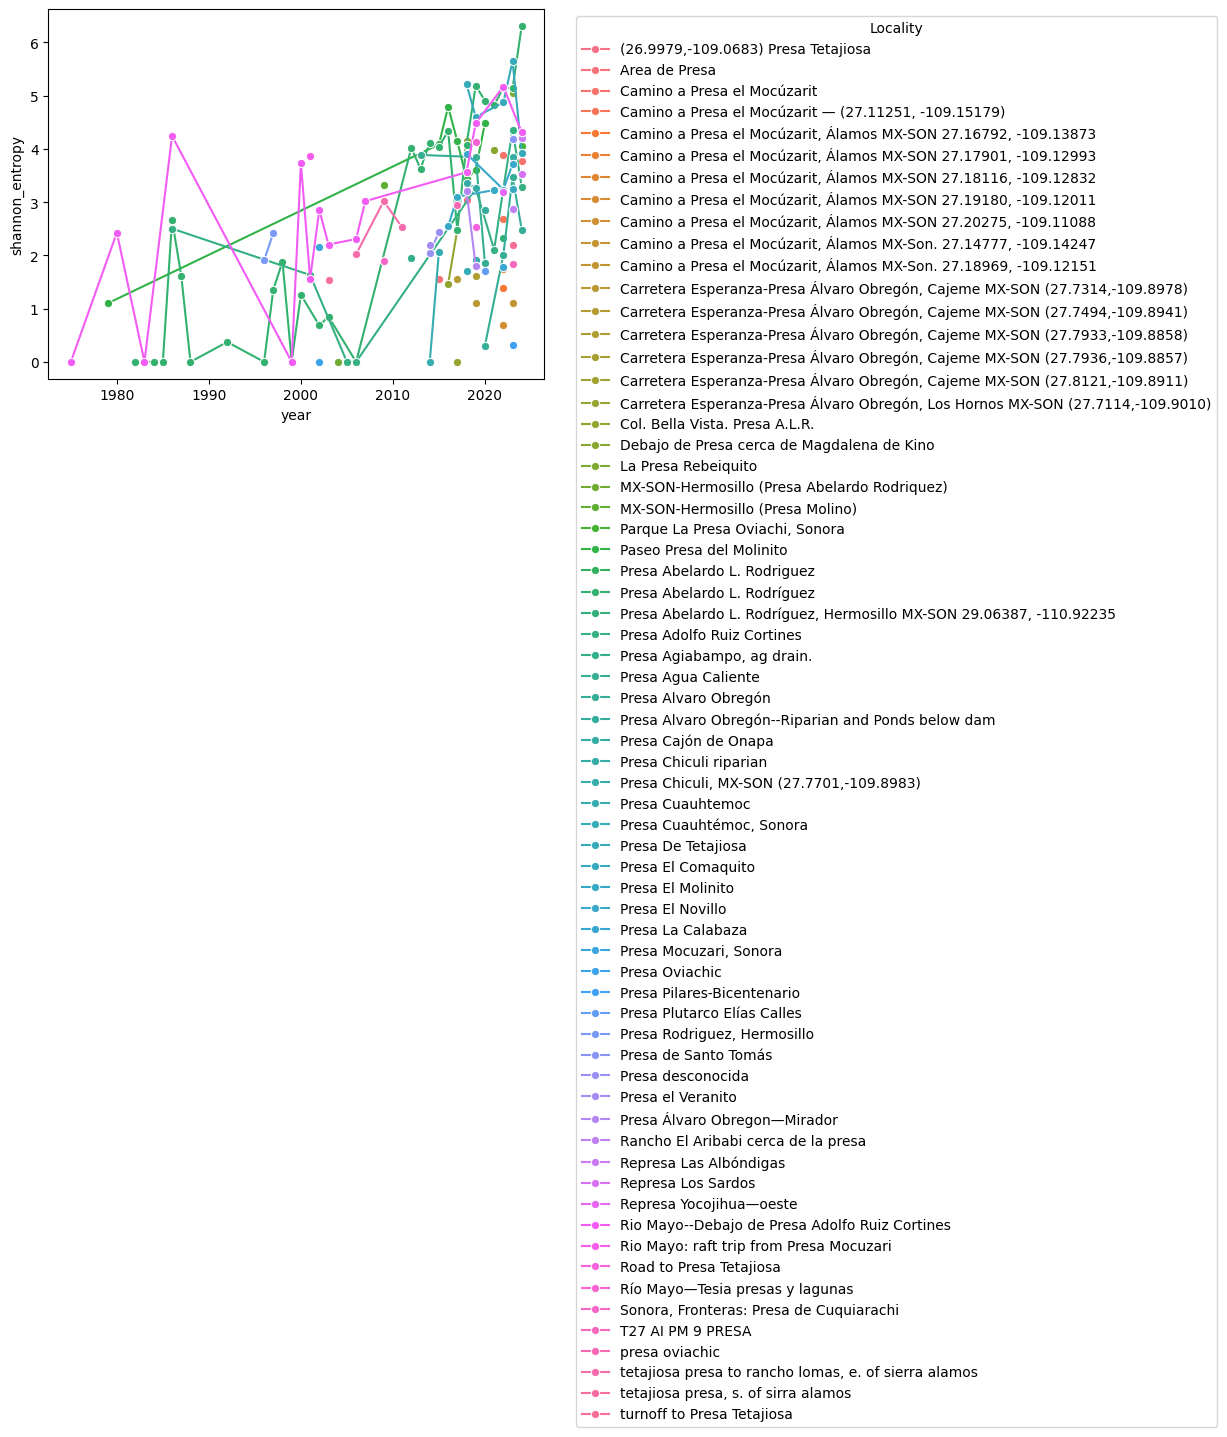

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(data=biodiversity, x='year', y='shannon_entropy', hue='locality', marker='o')
plt.legend(title='Locality', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Mapa

In [70]:
%pip install geopandas
%pip install contextily

Note: you may need to restart the kernel to use updated packages.
   ---------------------------------------- 0.0/25.4 MB ? eta -:--:--
   - -------------------------------------- 0.8/25.4 MB 3.7 MB/s eta 0:00:07
   -- ------------------------------------- 1.6/25.4 MB 3.6 MB/s eta 0:00:07
   --- ------------------------------------ 2.4/25.4 MB 3.6 MB/s eta 0:00:07
   ---- ----------------------------------- 3.1/25.4 MB 3.7 MB/s eta 0:00:07
   ------ --------------------------------- 3.9/25.4 MB 3.7 MB/s eta 0:00:06
   ------- -------------------------------- 4.7/25.4 MB 3.7 MB/s eta 0:00:06
   -------- ------------------------------- 5.5/25.4 MB 3.7 MB/s eta 0:00:06
   --------- ------------------------------ 6.3/25.4 MB 3.6 MB/s eta 0:00:06
   ----------- ---------------------------- 7.1/25.4 MB 3.6 MB/s eta 0:00:06
   ----------- ---------------------------- 7.6/25.4 MB 3.6 MB/s eta 0:00:05
   ------------ --------------------------- 8.1/25.4 MB 3.5 MB/s eta 0:00:05
   --------------

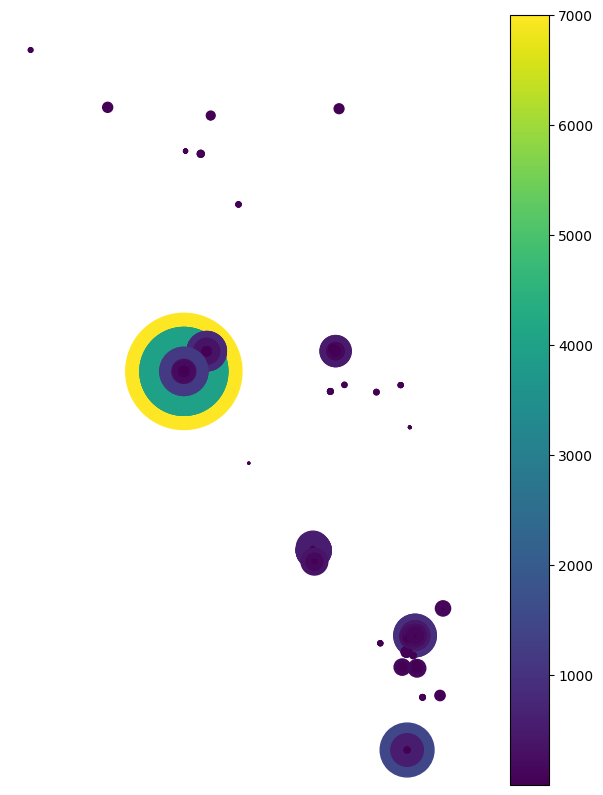

In [76]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming your biodiversity DataFrame has 'latitude' and 'longitude' columns for each locality
# If not, merge your biodiversity DataFrame with the original observations DataFrame to get coordinates per locality/year

gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df.decimallongitude, df.decimallatitude),
    crs="EPSG:4326"  # WGS84 Lat/Lon coordinate system
)

# Convert to Web Mercator for contextily basemap
gdf = gdf.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(12, 10))
gdf.plot(column='individualcount', cmap='viridis', markersize='individualcount', legend=True, ax=ax)



ax.set_axis_off()

In [79]:
%pip install folium

Note: you may need to restart the kernel to use updated packages.


In [83]:
%pip install folium.plugins

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement folium.plugins (from versions: none)
ERROR: No matching distribution found for folium.plugins


In [88]:
df.groupby(['decimallatitude','decimallongitude'])['individualcount'].sum().head().reset_index()

,decimallatitude,decimallongitude,individualcount
0,26.420263,-109.146614,2742.0
1,26.792875,-109.024250,158.0
2,26.805687,-108.886185,114.0
3,26.997946,-109.068290,454.0
4,26.999561,-109.066560,5258.0


In [92]:
import folium
from folium.plugins import MarkerCluster

byGIS = df.groupby(['decimallatitude','decimallongitude'])['individualcount'].sum().reset_index()

# Create a base map centered on average coordinates
m = folium.Map(location=[byGIS.decimallatitude.mean(), byGIS.decimallongitude.mean()], zoom_start=6)

# Use MarkerCluster for better visualization if many points
marker_cluster = MarkerCluster().add_to(m)

# Add points with popup showing Shannon entropy and other info
for _, row in byGIS.iterrows():
    folium.CircleMarker(
        location=[row['decimallatitude'], row['decimallongitude']],
        radius=7,
        popup=f"Total: {row['individualcount']:.2f}",
        color='blue',
        fill=True,
        fill_opacity=0.7
    ).add_to(marker_cluster)

# Save or display map
m.save('biodiversity_map.html')
m  # if in Jupyter notebook, this will display the interactive map
